In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import Point
import pyproj as proj
import seaborn as sns
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline

In [2]:
port = gpd.read_file('/Users/devashishkhulbe/Downloads/capstone/data/010115_123115_Data/NIJ2015_JAN01_DEC31.shp')
port.head()

,CATEGORY,CALL_GROUP,final_case,CASE_DESC,occ_date,x_coordina,y_coordina,census_tra,geometry
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2015-01-01,7624403.0,663901.0,30502.0,POINT (7624403 663901)
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2015-01-01,7626061.0,707425.0,4102.0,POINT (7626061 707425)
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2015-01-01,7626432.0,655739.0,6501.0,POINT (7626432 655739)
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2015-01-01,7638375.0,689076.0,4500.0,POINT (7638375 689076)
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2015-01-01,7640361.0,706981.0,3901.0,POINT (7640361 706981)


In [54]:
port14 = gpd.read_file('/Users/devashishkhulbe/Downloads/capstone/data/010114_123114_Data/NIJ2014_JAN01_DEC31.shp')
frames = [port14, port]

port = pd.concat(frames)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [55]:
port.shape

(397007, 11)

In [56]:
port.groupby(by='CALL_GROUP').count()

,CASE_DESC,CATEGORY,census_tra,final_case,geometry,lat,lng,occ_date,x_coordina,y_coordina
CALL_GROUP,,,,,,,,,,
DISORDER,129476,129476,129476,129476,129476,68076,68076,129476,129476,129476
NON CRIMINAL/ADMIN,81145,81145,81145,81145,81145,42431,42431,81145,81145,81145
PERSON CRIME,20117,20117,20117,20117,20117,10368,10368,20117,20117,20117
PROPERTY CRIME,68561,68561,68561,68561,68561,35370,35370,68561,68561,68561
SUSPICIOUS,54255,54255,54255,54255,54255,28838,28838,54255,54255,54255
TRAFFIC,43453,43453,43453,43453,43453,23000,23000,43453,43453,43453


In [70]:
x = list(port[port.CALL_GROUP == 'PERSON CRIME'].groupby(by='CASE_DESC').count().index.values)
x.remove('HOSTAGE SITUATION *H')
x.remove('BOMB - DEVICE DISCOVERED (33B) *H')
x.extend(['BURGLARY - COLD', 'BURGLARY - PRIORITY *H', 'THEFT - COLD', 'THEFT - PRIORITY', 'THEFT - SUBJECT IN CUSTODY', 
         'VEHICLE STOLEN - COLD', 'VEHICLE STOLEN - PRIORITY', 'SUSPICIOUS SUBJ, VEH, OR CIRCUMSTANCE', 
         'SUSPICIOUS - WITH WEAPON *H', 'SUSPICIOUS - PRIORITY', 'VICE-DRUGS, LIQUOR, PROSTITUTION, GAMBLING', 
         'DISTURBANCE - PRIORITY', 'NOISE DISTURBANCE', 'PARTY DISTURBANCE', 'THREAT-COLD'])
x

[u'ASSAULT - COLD',
 u'ASSAULT - PRIORITY',
 u'ASSAULT - WITH WEAPON *H',
 u'ASSISTANCE - RESPONDER EMERGENCY *H',
 u'ROBBERY - COLD',
 u'ROBBERY - PRIORITY *H',
 u'ROBBERY - WITH WEAPON *H',
 u'SHOOTING - COLD',
 u'SHOOTING - WITH WEAPON *H',
 u'SHOTS FIRED',
 u'STABBING - COLD',
 u'STABBING - WITH WEAPON *H',
 u'THREAT - PRIORITY',
 u'THREAT - WITH WEAPON *H',
 'BURGLARY - COLD',
 'BURGLARY - PRIORITY *H',
 'THEFT - COLD',
 'THEFT - PRIORITY',
 'THEFT - SUBJECT IN CUSTODY',
 'VEHICLE STOLEN - COLD',
 'VEHICLE STOLEN - PRIORITY',
 'SUSPICIOUS SUBJ, VEH, OR CIRCUMSTANCE',
 'SUSPICIOUS - WITH WEAPON *H',
 'SUSPICIOUS - PRIORITY',
 'VICE-DRUGS, LIQUOR, PROSTITUTION, GAMBLING',
 'DISTURBANCE - PRIORITY',
 'NOISE DISTURBANCE',
 'PARTY DISTURBANCE',
 'THREAT-COLD']

In [71]:
temp = port[port.CASE_DESC.isin(x)]
temp.shape

(171580, 11)

In [72]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3646', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = port.x_coordina.values, port.y_coordina.values
x2,y2 = transform(inProj,outProj,x1,y1)

In [73]:
port['lat'] = y2
port['lng'] = x2

geometry = [Point(xy) for xy in zip(port.lng, port.lat)]
crs = {'init': 'epsg:4326'}
port = gpd.GeoDataFrame(port, crs=crs, geometry=geometry)

port.head()

,CALL_GROUP,CASE_DESC,CATEGORY,census_tra,final_case,geometry,lat,lng,occ_date,x_coordina,y_coordina
0,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,4101.0,DISTP,POINT (-122.750437868889 45.60142206613081),45.601422,-122.750438,2014-01-01,7626189.0,713388.0
1,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,4102.0,DISTP,POINT (-122.7406360332374 45.59452371283109),45.594524,-122.740636,2014-01-01,7628627.0,710804.0
2,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,5900.0,DISTP,POINT (-122.6784838885518 45.48593811262613),45.485938,-122.678484,2014-01-01,7643463.0,670792.0
3,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,5100.0,DISTP,POINT (-122.670185816705 45.52460001374958),45.524600,-122.670186,2014-01-01,7645969.0,684826.0
4,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,7202.0,DISTP,POINT (-122.6652471505257 45.58905057272387),45.589051,-122.665247,2014-01-01,7647864.0,708283.0


In [74]:
portTarget = port[port.CASE_DESC.isin(x)]

In [75]:
counts = portTarget.groupby(by='CASE_DESC', as_index=False).count()[['CASE_DESC', 'occ_date']].sort_values(by='occ_date', ascending=False)
countsAll = port.groupby(by='CASE_DESC', as_index=False).count()[['CASE_DESC', 'occ_date']].sort_values(by='occ_date', ascending=False)[:25]

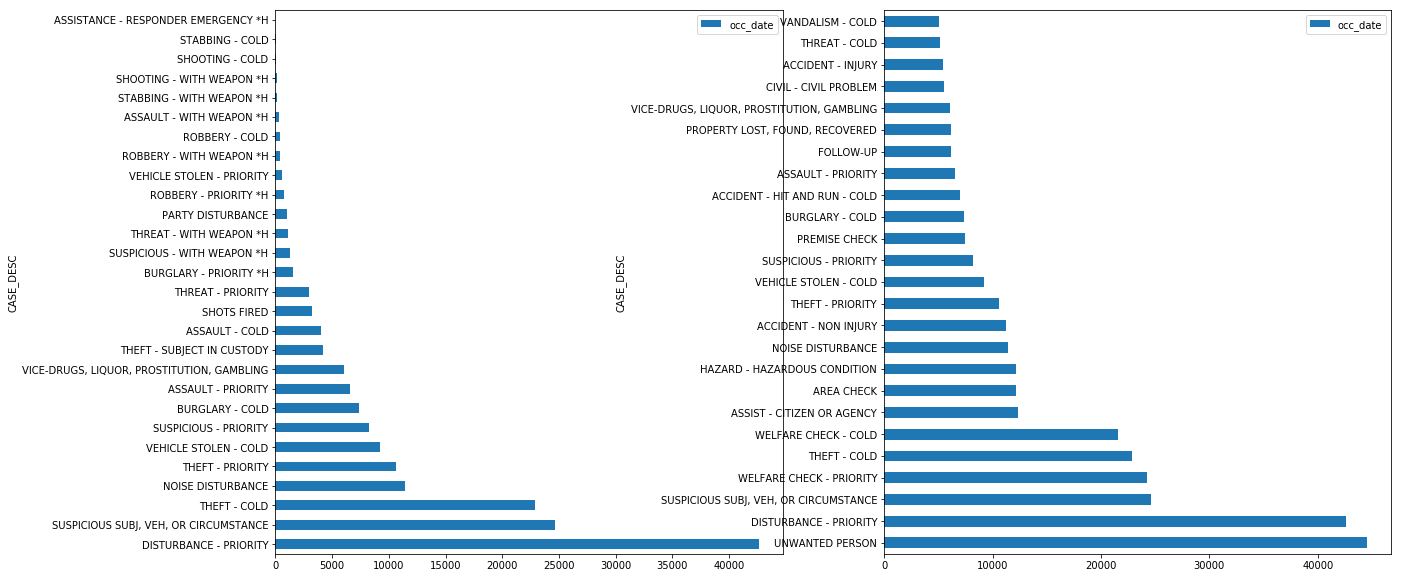

In [76]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
counts.plot.barh(x='CASE_DESC', rot=0, ax=ax1)

ax2 = fig.add_subplot(122)
countsAll.plot.barh(x='CASE_DESC', rot=0, ax=ax2)

In [28]:
cb = gpd.read_file('/Users/devashishkhulbe/Downloads/capstone/data/tl_2018_41_tabblock10/tl_2018_41_tabblock10.shp')
cb.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,41,009,970200,3062,410099702003062,Block 3062,G5040,R,None,None,S,186946,0,+46.1153692,-123.2742094,"POLYGON ((-123.281069 46.119448, -123.280988 4..."
1,41,009,970200,1089,410099702001089,Block 1089,G5040,R,None,None,S,148430,0,+46.0573536,-123.2673160,"POLYGON ((-123.271416 46.05865, -123.271038 46..."
2,41,009,970200,3120,410099702003120,Block 3120,G5040,R,None,None,S,778879,0,+46.0966322,-123.0930626,"POLYGON ((-123.103538 46.095786, -123.103485 4..."
3,41,009,970400,2034,410099704002034,Block 2034,G5040,R,None,None,S,3263433,0,+45.9617584,-122.9289065,"POLYGON ((-122.949733 45.961942, -122.94972 45..."
4,41,009,971000,3009,410099710003009,Block 3009,G5040,R,None,None,S,335226,0,+45.7866329,-123.0526479,"POLYGON ((-123.054245 45.792922, -123.05416 45..."


In [77]:
ct = gpd.read_file('/Users/devashishkhulbe/Downloads/capstone/data/cb_2017_41_tract_500k/cb_2017_41_tract_500k.shp')
ct = ct[['AFFGEOID', 'GEOID', 'ALAND', 'geometry']]
ct['GEOID'] = ct['GEOID'].astype(int)
ct.head()

,AFFGEOID,GEOID,ALAND,geometry
0,1400000US41001950300,41001950300,1751774361,"POLYGON ((-117.950623 44.74899, -117.944558 44..."
1,1400000US41003001001,41003001001,1750595,"POLYGON ((-123.267164 44.59381399999999, -123...."
2,1400000US41003001002,41003001002,1656250,"POLYGON ((-123.283122 44.586427, -123.276025 4..."
3,1400000US41005020302,41005020302,3458164,"POLYGON ((-122.744057 45.418585, -122.744006 4..."
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45..."


In [78]:
portTarget = gpd.sjoin(ct, portTarget)
portTarget.head()

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,AFFGEOID,GEOID,ALAND,geometry,index_right,CALL_GROUP,CASE_DESC,CATEGORY,census_tra,final_case,lat,lng,occ_date,x_coordina,y_coordina
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45...",119167,PROPERTY CRIME,THEFT - COLD,OTHER,20900.0,THEFT,45.458718,-122.622656,2015-08-07,7657515.0,660490.0
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45...",4253,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,20900.0,DISTP,45.459879,-122.622672,2014-09-03,7657522.0,660913.0
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45...",23094,PERSON CRIME,ASSAULT - PRIORITY,STREET CRIMES,20900.0,ASSLTP,45.461067,-122.622530,2015-03-04,7657570.0,661345.0
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45...",27096,DISORDER,DISTURBANCE - PRIORITY,STREET CRIMES,20900.0,DISTP,45.461067,-122.622530,2015-05-31,7657570.0,661345.0
4,1400000US41005020900,41005020900,1763510,"POLYGON ((-122.63656 45.461474, -122.626278 45...",116047,PROPERTY CRIME,THEFT - COLD,OTHER,20900.0,THEFT,45.461067,-122.622530,2015-03-06,7657570.0,661345.0


In [79]:
portTarget.drop(columns={'x_coordina', 'y_coordina'}, inplace=True)

In [80]:
pop = pd.read_csv('/Users/devashishkhulbe/Downloads/capstone/data/ACS_17_5YR_B01003 (1)/ACS_17_5YR_B01003_with_ann.csv')
pop = pop.loc[1:, :]
pop['GEO.id2'] = pop['GEO.id2'].astype(int)
pop = pop[['GEO.id2', 'HD01_VD01']]
pop.head()

,GEO.id2,HD01_VD01
1,41051000100,6380
2,41051000200,6458
3,41051000301,5504
4,41051000302,7184
5,41051000401,3784


In [81]:
housing = pd.read_csv('/Users/devashishkhulbe/Downloads/capstone/data/DEC_10_SF1_SF1DP1/DEC_10_SF1_SF1DP1_with_ann.csv')
new_header = housing.iloc[0] #grab the first row for the header
housing = housing[1:] #take the data less the header row
housing.columns = new_header 
housing.head()

,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under 5 years,Percent; SEX AND AGE - Total population - Under 5 years,Number; SEX AND AGE - Total population - 5 to 9 years,Percent; SEX AND AGE - Total population - 5 to 9 years,Number; SEX AND AGE - Total population - 10 to 14 years,...,Number; HOUSING TENURE - Occupied housing units - Owner-occupied housing units - Population in owner-occupied housing units,Percent; HOUSING TENURE - Occupied housing units - Owner-occupied housing units - Population in owner-occupied housing units,Number; HOUSING TENURE - Occupied housing units - Owner-occupied housing units - Average household size of owner-occupied units,Percent; HOUSING TENURE - Occupied housing units - Owner-occupied housing units - Average household size of owner-occupied units,Number; HOUSING TENURE - Occupied housing units - Renter-occupied housing units,Percent; HOUSING TENURE - Occupied housing units - Renter-occupied housing units,Number; HOUSING TENURE - Occupied housing units - Renter-occupied housing units - Population in renter-occupied housing units,Percent; HOUSING TENURE - Occupied housing units - Renter-occupied housing units - Population in renter-occupied housing units,Number; HOUSING TENURE - Occupied housing units - Renter-occupied housing units - Average household size of renter-occupied units,Percent; HOUSING TENURE - Occupied housing units - Renter-occupied housing units - Average household size of renter-occupied units
1,1400000US41051000100,41051000100,"Census Tract 1, Multnomah County, Oregon",5927,100.0,365,6.2,374,6.3,213,...,3682,( X ),2.30,( X ),1166,42.2,2237,( X ),1.92,( X )
2,1400000US41051000200,41051000200,"Census Tract 2, Multnomah County, Oregon",5777,100.0,380,6.6,284,4.9,216,...,2943,( X ),2.33,( X ),1607,56.0,2832,( X ),1.76,( X )
3,1400000US41051000301,41051000301,"Census Tract 3.01, Multnomah County, Oregon",5041,100.0,160,3.2,125,2.5,116,...,1829,( X ),2.26,( X ),1361,62.7,2226,( X ),1.64,( X )
4,1400000US41051000302,41051000302,"Census Tract 3.02, Multnomah County, Oregon",6709,100.0,386,5.8,502,7.5,433,...,5878,( X ),2.55,( X ),287,11.1,795,( X ),2.77,( X )
5,1400000US41051000401,41051000401,"Census Tract 4.01, Multnomah County, Oregon",3418,100.0,229,6.7,164,4.8,143,...,2445,( X ),2.28,( X ),386,26.5,938,( X ),2.43,( X )


In [82]:
housing = housing[housing['Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units'] != '(X)']

housing['Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units'] = \
housing['Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units'].astype(float)
housing['Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units'].describe()

count    170.000000
mean       6.047059
std        2.743280
min        2.100000
25%        4.625000
50%        5.450000
75%        6.375000
max       21.700000
Name: Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units, dtype: float64

In [83]:
housing = housing[['Id2', 'Number; SEX AND AGE - Total population', 
                   'Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units']]
housing.rename(columns={'Number; SEX AND AGE - Total population':'population', 
                       'Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units':'vacant_houses_perc'}, inplace=True)
housing['Id2'] = housing['Id2'].astype(int)
housing['population'] = housing['population'].astype(int)

In [84]:
counts = portTarget.groupby(by=['GEOID', 'CASE_DESC'], as_index=False).count()[['GEOID', 'CASE_DESC', 'final_case']]
counts.head()

,GEOID,CASE_DESC,final_case
0,41005020303,ASSAULT - COLD,1
1,41005020800,ASSAULT - COLD,1
2,41005020800,ASSAULT - PRIORITY,1
3,41005020800,BURGLARY - COLD,3
4,41005020800,BURGLARY - PRIORITY *H,1


In [85]:
crimesum = counts.groupby(by='CASE_DESC', as_index=False).sum()[['CASE_DESC', 'final_case']]
crimesum.rename(columns={'final_case':'case_sum'}, inplace=True)
crimesum.head()

,CASE_DESC,case_sum
0,ASSAULT - COLD,4021
1,ASSAULT - PRIORITY,6546
2,ASSAULT - WITH WEAPON *H,300
3,ASSISTANCE - RESPONDER EMERGENCY *H,1
4,BURGLARY - COLD,7380


In [86]:
counts = counts.merge(crimesum, on='CASE_DESC')
counts['prop_crime'] = counts['final_case']/counts['case_sum']
counts.head()

,GEOID,CASE_DESC,final_case,case_sum,prop_crime
0,41005020303,ASSAULT - COLD,1,4021,0.000249
1,41005020800,ASSAULT - COLD,1,4021,0.000249
2,41005020900,ASSAULT - COLD,3,4021,0.000746
3,41005022107,ASSAULT - COLD,9,4021,0.002238
4,41005022206,ASSAULT - COLD,1,4021,0.000249


In [87]:
propDf = None
count = 0

for crime in counts.CASE_DESC.unique():
    
    temp = counts[counts.CASE_DESC == crime]
    temp.index = temp.GEOID
    temp.drop(columns={'GEOID', 'CASE_DESC', 'case_sum', 'final_case'}, inplace=True)
    temp = temp.T
    temp.reset_index(drop=True, inplace=True)
    #print temp
    if count == 0:
        propDf = temp
    else:
        propDf = propDf.append(temp)
    print count
    count +=1
    
   # counts[['GEOID', 'prop_crime']].T

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [88]:
propDf['crime'] = counts.CASE_DESC.unique()
propDf.reset_index(drop=True, inplace=True)
propDf.head()

GEOID,41005020303,41005020800,41005020900,41005021000,41005021100,41005021400,41005021601,41005022107,41005022201,41005022206,...,41051980000,41067030101,41067030102,41067030300,41067030402,41067030502,41067030600,41067031617,41067032005,crime
0,0.000249,0.000249,0.000746,NaN,NaN,NaN,NaN,0.002238,NaN,0.000249,...,0.000995,0.001741,NaN,NaN,0.000249,0.002487,NaN,0.000249,NaN,ASSAULT - COLD
1,NaN,0.000153,0.000153,0.000153,NaN,NaN,NaN,NaN,NaN,0.000306,...,0.000306,NaN,0.000153,NaN,0.000153,0.000306,NaN,NaN,NaN,ASSAULT - PRIORITY
2,NaN,0.000407,0.000136,NaN,NaN,NaN,NaN,NaN,NaN,0.000407,...,0.000813,NaN,0.000136,0.000136,NaN,0.000136,NaN,NaN,NaN,BURGLARY - COLD
3,NaN,0.000661,0.000661,NaN,NaN,NaN,NaN,NaN,NaN,0.001323,...,0.001323,NaN,NaN,NaN,NaN,0.001323,NaN,NaN,NaN,BURGLARY - PRIORITY *H
4,NaN,0.000117,0.000094,NaN,NaN,NaN,0.00007,NaN,NaN,0.000282,...,0.000258,0.000023,0.000070,0.000094,0.000047,0.000563,0.000047,NaN,NaN,DISTURBANCE - PRIORITY


In [89]:
propDf.fillna(0, inplace=True)

### Clustering : no significant clustering : almost all fall into same 

In [90]:
portTarget['occ_date'] = pd.to_datetime(portTarget['occ_date'])
crimePmonth = portTarget.groupby(pd.Grouper(key='occ_date', freq='M')).count()[['lat']]
crimePmonth.rename(columns={'lat':'Ncrimes'}, inplace=True)
crimePmonth.head()

,Ncrimes
occ_date,
2014-01-31,5785
2014-02-28,5068
2014-03-31,6556
2014-04-30,6492
2014-05-31,7206


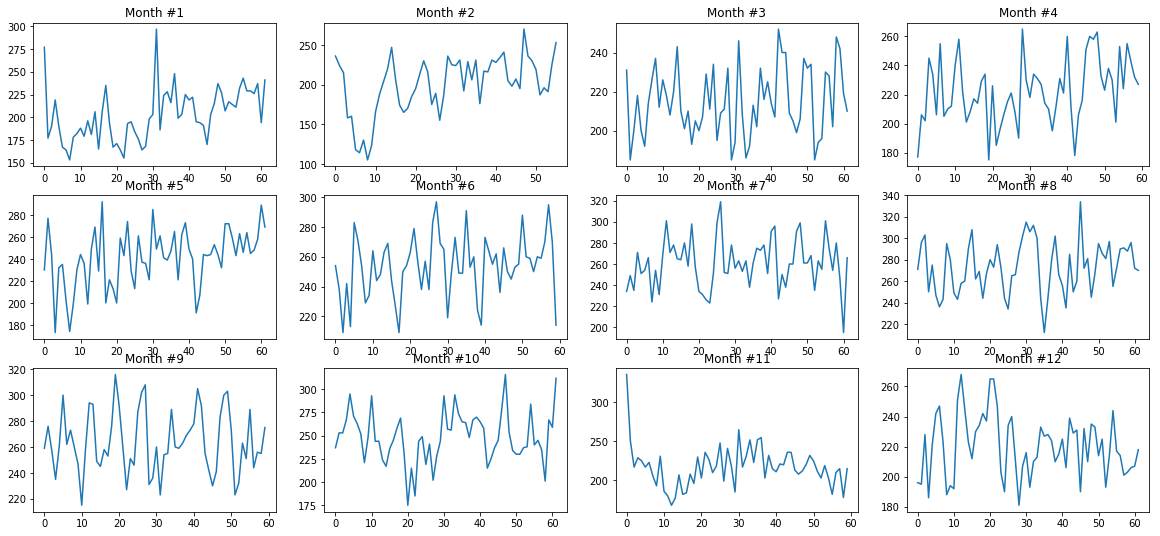

In [91]:
plt.figure(figsize=(20,9))

for i in range(1,13):
    temp = portTarget[portTarget.occ_date.dt.month.values == i]
    temp = temp.groupby(by='occ_date').count()[['lat']]
    
    
    ax = plt.subplot(3, 4, i)
    ax.plot(range(len(temp)), temp.lat)
    title = 'Month #' + str(i)
    ax.set_title(title)

#portTarget['occ_date'].dt.month.values

Text(0.5,1,'Crimes in Portland')

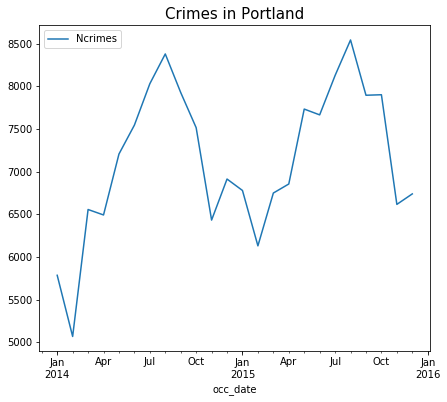

In [92]:
crimePmonth.plot(figsize=(7,6))
plt.title('Crimes in Portland', fontsize=15)

In [93]:
portTarget['occ_date'] = pd.to_datetime(portTarget['occ_date'])
crimePweek = portTarget.groupby(pd.Grouper(key='occ_date', freq='W')).count()[['lat']]
crimePweek.rename(columns={'lat':'Ncrimes'}, inplace=True)
crimePweek.head()

,Ncrimes
occ_date,
2014-01-05,1053
2014-01-12,1211
2014-01-19,1383
2014-01-26,1229
2014-02-02,1369


In [94]:
portTarget.shape

(171580, 13)

In [95]:
income = pd.read_csv('/Users/devashishkhulbe/Downloads/capstone/data/ACS_17_5YR_S2301/ACS_17_5YR_S2301_with_ann.csv')
new_header = income.iloc[0] #grab the first row for the header
income = income[1:] #take the data less the header row
income.columns = new_header
income.head()

,Id,Id2,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,Labor Force Participation Rate; Estimate; Population 16 years and over,Labor Force Participation Rate; Margin of Error; Population 16 years and over,Employment/Population Ratio; Estimate; Population 16 years and over,Employment/Population Ratio; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree,Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Some college or associate's degree,Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Total; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Labor Force Participation Rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Labor Force Participation Rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Employment/Population Ratio; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Employment/Population Ratio; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher
1,1400000US41051000100,41051000100,"Census Tract 1, Multnomah County, Oregon",5141,335,71.9,4.8,68.3,4.8,5.1,...,10.5,8.2,2501,288,88.5,4.5,86.9,4.7,1.8,1.7
2,1400000US41051000200,41051000200,"Census Tract 2, Multnomah County, Oregon",5310,303,65.5,4.4,60.3,4.3,7.9,...,12.2,9.1,2328,333,84.9,4.8,78.5,5.9,7.6,5.0
3,1400000US41051000301,41051000301,"Census Tract 3.01, Multnomah County, Oregon",5012,396,62.1,4.4,57.6,4.5,6.2,...,9.1,7.2,1261,221,86.8,7.0,83.9,7.9,3.4,4.0
4,1400000US41051000302,41051000302,"Census Tract 3.02, Multnomah County, Oregon",5682,243,71.1,3.7,67.7,3.7,4.8,...,5.3,5.7,3025,270,85.5,4.2,82.2,4.5,3.9,2.5
5,1400000US41051000401,41051000401,"Census Tract 4.01, Multnomah County, Oregon",3186,181,70.2,4.1,65.7,4.6,6.4,...,4.2,4.8,1442,203,87.7,4.8,85.1,5.0,3.0,2.4


In [96]:
np.set_printoptions(threshold=np.inf)
print income.columns.values

['Id' 'Id2' 'Geography' 'Total; Estimate; Population 16 years and over'
 'Total; Margin of Error; Population 16 years and over'
 'Labor Force Participation Rate; Estimate; Population 16 years and over'
 'Labor Force Participation Rate; Margin of Error; Population 16 years and over'
 'Employment/Population Ratio; Estimate; Population 16 years and over'
 'Employment/Population Ratio; Margin of Error; Population 16 years and over'
 'Unemployment rate; Estimate; Population 16 years and over'
 'Unemployment rate; Margin of Error; Population 16 years and over'
 'Total; Estimate; AGE - 16 to 19 years'
 'Total; Margin of Error; AGE - 16 to 19 years'
 'Labor Force Participation Rate; Estimate; AGE - 16 to 19 years'
 'Labor Force Participation Rate; Margin of Error; AGE - 16 to 19 years'
 'Employment/Population Ratio; Estimate; AGE - 16 to 19 years'
 'Employment/Population Ratio; Margin of Error; AGE - 16 to 19 years'
 'Unemployment rate; Estimate; AGE - 16 to 19 years'
 'Unemployment rate; Marg

In [97]:
income = income[['Id', 'Id2', 'Unemployment rate; Estimate; Population 16 years and over', 
                'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Below poverty level', 
                'Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years']]
income.rename(columns={'Unemployment rate; Estimate; Population 16 years and over':'unemploy_rate', 
                      'Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Below poverty level':'NumPoverty', 
                      'Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years':'NumEducated'}, inplace=True)

income.head()

,Id,Id2,unemploy_rate,NumPoverty,NumEducated
1,1400000US41051000100,41051000100,5.1,270,3979
2,1400000US41051000200,41051000200,7.9,627,4108
3,1400000US41051000301,41051000301,6.2,558,2689
4,1400000US41051000302,41051000302,4.8,154,4228
5,1400000US41051000401,41051000401,6.4,212,2506


In [98]:
#income.drop(columns={'Id'}, inplace=True)
#income['employ_rate'] = pd.to_numeric(income['employ_rate'], errors='coerce')
income['Id2'] = income['Id2'].astype(int)
income['unemploy_rate'] = pd.to_numeric(income['unemploy_rate'], errors='coerce')
income['NumPoverty'] = income['NumPoverty'].astype(int)
income['NumEducated'] = income['NumEducated'].astype(int)
income = income.merge(pop, left_on='Id2', right_on='GEO.id2')
income.rename(columns={'HD01_VD01':'population'}, inplace=True)
income['population'] = income['population'].astype(int)
income['povRate'] = income['NumPoverty']/income['population']
income['eduRate'] = income['NumEducated']/income['population']

income.head()
#portTarget.merge(income, on='Id2')

# income = income.merge(pop, left_on='Id2', right_on='GEO.id2')
# income.rename(columns={'HD01_VD01':'population'}, inplace=True)


,Id,Id2,unemploy_rate,NumPoverty,NumEducated,GEO.id2,population,povRate,eduRate
0,1400000US41051000100,41051000100,5.1,270,3979,41051000100,6380,0.042320,0.623668
1,1400000US41051000200,41051000200,7.9,627,4108,41051000200,6458,0.097089,0.636110
2,1400000US41051000301,41051000301,6.2,558,2689,41051000301,5504,0.101381,0.488554
3,1400000US41051000302,41051000302,4.8,154,4228,41051000302,7184,0.021437,0.588530
4,1400000US41051000401,41051000401,6.4,212,2506,41051000401,3784,0.056025,0.662262


In [99]:
ct = ct.merge(housing, left_on='GEOID', right_on='Id2')
ct = ct.merge(income, on='Id2')
ct.head()

,AFFGEOID,GEOID,ALAND,geometry,Id2,population_x,vacant_houses_perc,Id,unemploy_rate,NumPoverty,NumEducated,GEO.id2,population_y,povRate,eduRate
0,1400000US41051000301,41051000301,2270906,"POLYGON ((-122.643518 45.490316, -122.639572 4...",41051000301,5041,3.9,1400000US41051000301,6.2,558,2689,41051000301,5504,0.101381,0.488554
1,1400000US41051001701,41051001701,2024977,"POLYGON ((-122.596482 45.528266, -122.596431 4...",41051001701,6402,5.3,1400000US41051001701,5.7,536,4657,41051001701,7031,0.076234,0.662352
2,1400000US41051002901,41051002901,1536178,"POLYGON ((-122.604511 45.549671, -122.60448 45...",41051002901,4428,4.5,1400000US41051002901,5.3,250,2961,41051002901,4432,0.056408,0.668096
3,1400000US41051003501,41051003501,1285559,"POLYGON ((-122.697557 45.56269899999999, -122....",41051003501,3518,4.5,1400000US41051003501,5.5,320,2492,41051003501,3644,0.087816,0.683864
4,1400000US41051004900,41051004900,545636,"POLYGON ((-122.700853 45.535454, -122.694762 4...",41051004900,3537,7.3,1400000US41051004900,4.0,612,3023,41051004900,4034,0.151710,0.749380


In [198]:
portTarget['dayofWeek'] = portTarget['occ_date'].dt.dayofweek

crimeDayWeek = portTarget.groupby(by=['CASE_DESC', 'dayofWeek'], as_index=False).count()[['CASE_DESC', 'dayofWeek', 'lat']]
crimeDayWeek.head()

,CASE_DESC,dayofWeek,lat
0,ASSAULT - COLD,0,610
1,ASSAULT - COLD,1,561
2,ASSAULT - COLD,2,612
3,ASSAULT - COLD,3,561
4,ASSAULT - COLD,4,605


In [199]:
piv = pd.pivot_table(crimeDayWeek, values="lat",index=["dayofWeek"], columns=["CASE_DESC"], fill_value=0)
piv = (piv - piv.mean())/piv.std()

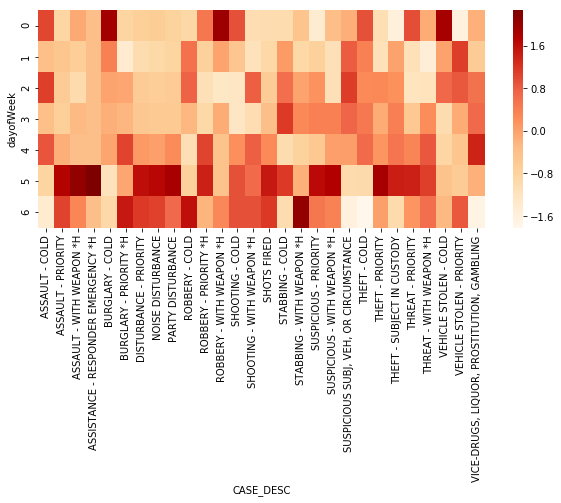

In [200]:
plt.figure(figsize=(10,4))
sns.heatmap(piv, cmap='OrRd')

In [201]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2, 10))


for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(piv.T)
    centers = clusterer.cluster_centers_

    score = silhouette_score (piv.T, preds, metric='euclidean')
    print "For n_clusters = {}, silhouette score is {})".format(n_clusters, score)

For n_clusters = 2, silhouette score is 0.372934063946)
For n_clusters = 3, silhouette score is 0.330912548764)
For n_clusters = 4, silhouette score is 0.286218311165)
For n_clusters = 5, silhouette score is 0.275079530073)
For n_clusters = 6, silhouette score is 0.285266125127)
For n_clusters = 7, silhouette score is 0.311674208877)
For n_clusters = 8, silhouette score is 0.307841272707)
For n_clusters = 9, silhouette score is 0.278793522098)


In [202]:
km = KMeans(random_state=234,n_clusters=2)
res=km.fit(piv.T)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1]

Cluster centers:
[[-0.58849758 -0.65367022 -0.31813027 -0.2379389   0.04069973  1.16795685
   0.58958039]
 [ 1.05955771  0.08084802  0.35289912  0.03240096  0.23682564 -0.70489435
  -1.0576371 ]]

Sum of squared errors: 91.9743495784


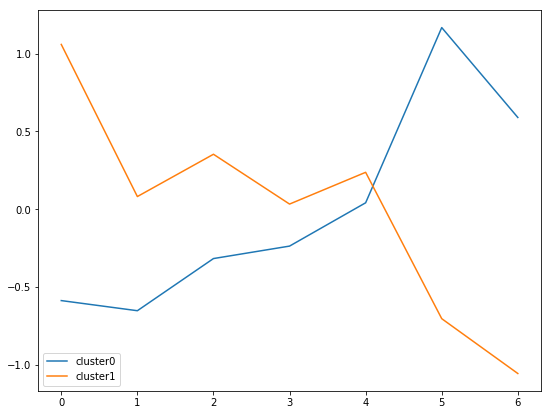

In [203]:
plt.figure(figsize=(9,7))

plt.plot(res.cluster_centers_[0], label='cluster0')
plt.plot(res.cluster_centers_[1], label='cluster1')
plt.legend()

In [147]:
clusterDayWeek = piv.T
clusterDayWeek['cluster'] = res.labels_
clusterDayWeek

dayofWeek,0,1,2,3,4,5,6,cluster
CASE_DESC,,,,,,,,
ASSAULT - COLD,1.032197,-0.389665,1.090233,-0.389665,0.887109,-0.824929,-1.405281,1
ASSAULT - PRIORITY,-0.846173,-0.492778,-0.608016,-0.707888,-0.147065,1.735149,1.066771,0
ASSAULT - WITH WEAPON *H,-0.083992,-0.671937,-0.965909,-0.279974,-0.377964,2.071805,0.307971,0
ASSISTANCE - RESPONDER EMERGENCY *H,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,2.267787,-0.377964,0
BURGLARY - COLD,1.905117,0.384705,-0.014726,-0.150016,-0.040495,-1.155035,-0.929550,1
BURGLARY - PRIORITY *H,-0.814544,-1.402825,-0.045252,-0.226262,1.040806,-0.045252,1.493330,0
DISTURBANCE - PRIORITY,-0.697969,-0.992036,-0.609256,-0.536972,0.095519,1.598711,1.142003,0
NOISE DISTURBANCE,-0.641785,-0.912981,-0.651471,-0.575600,0.021677,1.687598,1.072563,0
PARTY DISTURBANCE,-0.772432,-0.822497,-0.630581,-0.572172,0.253901,1.864326,0.679454,0


In [148]:
## other crimes as features

In [236]:
cluster0count = portTarget[portTarget.CASE_DESC.isin(clusterDayWeek[clusterDayWeek.cluster == 0].index.values)]
cluster0count = cluster0count.groupby(by='GEOID', as_index=False).count()[['GEOID', 'lat']]

cluster1count = portTarget[portTarget.CASE_DESC.isin(clusterDayWeek[clusterDayWeek.cluster == 1].index.values)]
cluster1count = cluster1count.groupby(by='GEOID', as_index=False).count()[['GEOID', 'lat']]

temp = portTarget[['GEOID', 'geometry']]

cluster0count = temp.merge(cluster0count, on='GEOID')
cluster0count.drop_duplicates(subset='GEOID', inplace=True)
cluster1count = temp.merge(cluster1count, on='GEOID')
cluster1count.drop_duplicates(subset='GEOID', inplace=True)

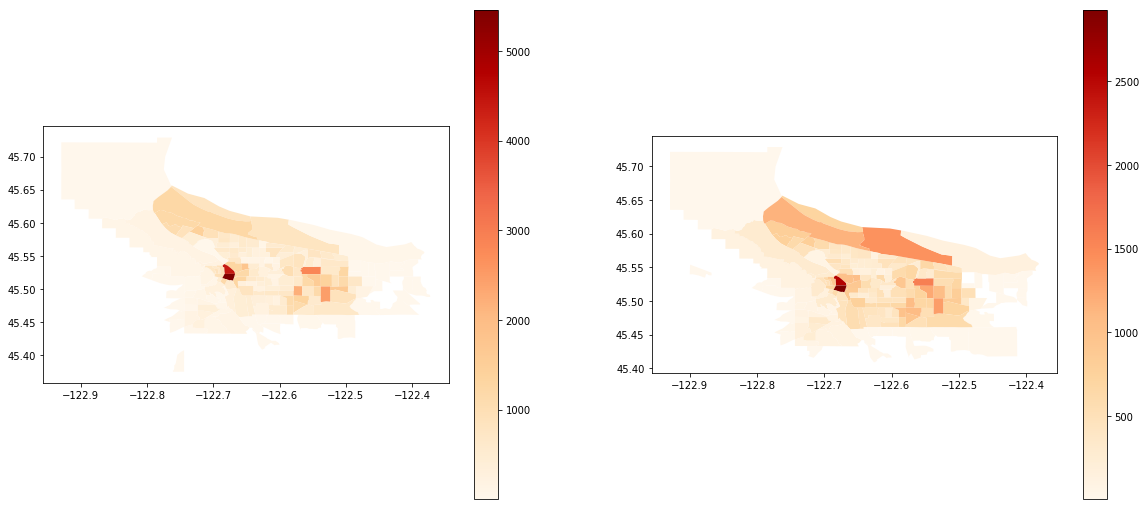

In [238]:
fig = plt.figure(figsize=(20,9))

ax1 = fig.add_subplot(121)
cluster0count.plot(column='lat', legend=True, cmap='OrRd', ax=ax1)

ax2 = fig.add_subplot(122)
cluster1count.plot(column='lat', legend=True, cmap='OrRd', ax=ax2)

In [177]:
portNotTarget = port[~port.CASE_DESC.isin(x)]
portNotTarget['occ_date'] = pd.to_datetime(portNotTarget['occ_date'])
portNotTarget['dayofWeek'] = portNotTarget['occ_date'].dt.dayofweek
portNotTarget.head()

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CALL_GROUP,CASE_DESC,CATEGORY,census_tra,final_case,geometry,lat,lng,occ_date,x_coordina,y_coordina,dayofWeek
7556,DISORDER,DISTURBANCE - WITH WEAPON *H,STREET CRIMES,8202.0,DISTW,POINT (-122.5552998508377 45.5186599225913),45.518660,-122.555300,2014-01-01,7675348.0,681891.0,2
7557,DISORDER,DISTURBANCE - WITH WEAPON *H,STREET CRIMES,6403.0,DISTW,POINT (-122.7222442642678 45.4483250155774),45.448325,-122.722244,2014-01-06,7631867.0,657389.0,0
7558,DISORDER,DISTURBANCE - WITH WEAPON *H,STREET CRIMES,7900.0,DISTW,POINT (-122.5441293210686 45.55538121928971),45.555381,-122.544129,2014-01-11,7678549.0,695203.0,5
7559,DISORDER,DISTURBANCE - WITH WEAPON *H,STREET CRIMES,9501.0,DISTW,POINT (-122.4968543786977 45.54874969736294),45.548750,-122.496854,2014-01-22,7690595.0,692483.0,2
7560,DISORDER,DISTURBANCE - WITH WEAPON *H,STREET CRIMES,2303.0,DISTW,POINT (-122.6678408093858 45.53218659352084),45.532187,-122.667841,2014-01-23,7646644.0,687575.0,3


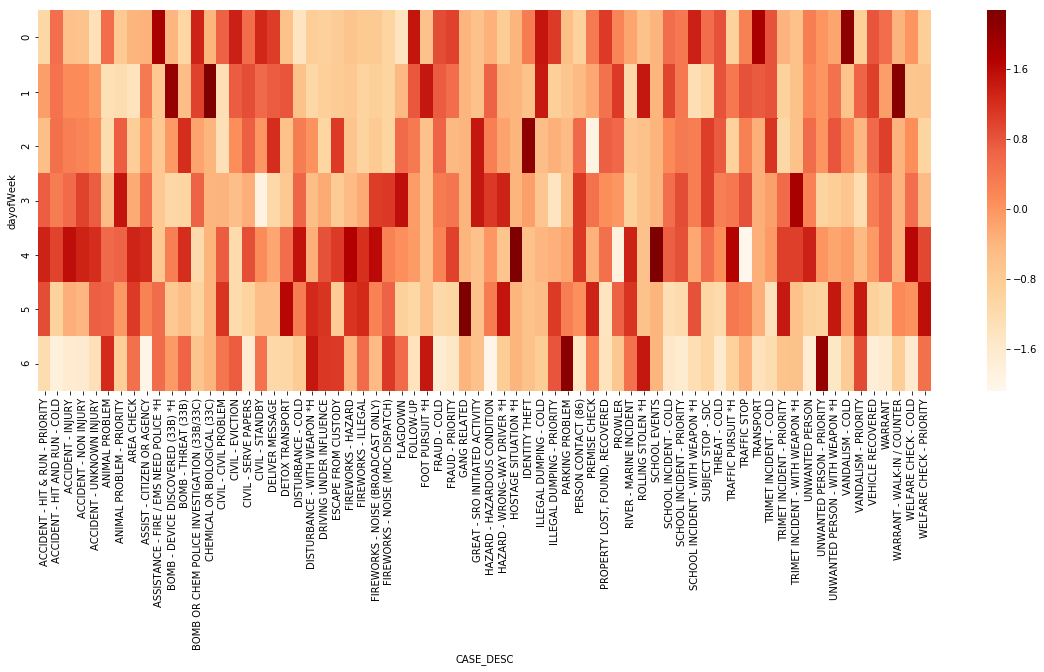

In [204]:
crimeDayWeek = portNotTarget.groupby(by=['CASE_DESC', 'dayofWeek'], as_index=False).count()[['CASE_DESC', 'dayofWeek', 'lat']]

piv = pd.pivot_table(crimeDayWeek, values="lat",index=["dayofWeek"], columns=["CASE_DESC"], fill_value=0)
piv = (piv - piv.mean())/piv.std()
plt.figure(figsize=(20,7))
sns.heatmap(piv, cmap='OrRd')

In [205]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2, 10))


for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(piv.T)
    centers = clusterer.cluster_centers_

    score = silhouette_score (piv.T, preds, metric='euclidean')
    print "For n_clusters = {}, silhouette score is {})".format(n_clusters, score)

For n_clusters = 2, silhouette score is 0.250162373205)
For n_clusters = 3, silhouette score is 0.23747682281)
For n_clusters = 4, silhouette score is 0.239850379616)
For n_clusters = 5, silhouette score is 0.230377183229)
For n_clusters = 6, silhouette score is 0.257994888589)
For n_clusters = 7, silhouette score is 0.263465659026)
For n_clusters = 8, silhouette score is 0.260458602545)
For n_clusters = 9, silhouette score is 0.266877075872)


In [206]:
km = KMeans(random_state=234,n_clusters=2)
res=km.fit(piv.T)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1]

Cluster centers:
[[ 0.49969419  0.49749658  0.40952744  0.12456897  0.14457343 -0.51438492
  -1.16147568]
 [-0.49483454 -0.46670941 -0.45947201 -0.05829842  0.64422165  0.56960775
   0.26548497]]

Sum of squared errors: 286.098868358


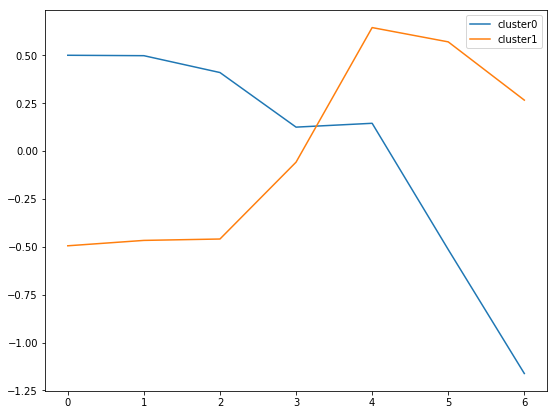

In [207]:
plt.figure(figsize=(9,7))

plt.plot(res.cluster_centers_[0], label='cluster0')
plt.plot(res.cluster_centers_[1], label='cluster1')
plt.legend()

In [212]:
bars = pd.read_csv('/Users/devashishkhulbe/Downloads/capstone/data/PortlandBars.csv')
bars = bars[['restaurant_alias', 'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude', 
            'restaurant_location_state', 'restaurant_location_zip_code', 'restaurant_location_city']]

geometry = [Point(xy) for xy in zip(bars.restaurant_coordinates_longitude, bars.restaurant_coordinates_latitude)]
crs = {'init': 'epsg:4326'}
bars = gpd.GeoDataFrame(bars, crs=crs, geometry=geometry)
bars.head()

,restaurant_alias,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,geometry
0,teardrop-cocktail-lounge-portland,45.525217,-122.681642,OR,97209,Portland,POINT (-122.681641737 45.5252174293)
1,lulu-portland,45.517650,-122.660410,OR,97214,Portland,POINT (-122.66041 45.51765)
2,bible-club-portland,45.474097,-122.649831,OR,97202,Portland,POINT (-122.649830617 45.4740967378)
3,baileys-taproom-portland,45.522556,-122.678042,OR,97205,Portland,POINT (-122.678042 45.522556)
4,revolution-hall-rooftop-bar-portland,45.518956,-122.652086,OR,97214,Portland,POINT (-122.65208604 45.5189560841)


In [217]:
temp = ct[['GEOID', 'geometry']]

temp = gpd.sjoin(temp, bars)
nBars = temp.groupby(by='GEOID', as_index=False).count()[['GEOID', 'restaurant_alias']]
nBars.rename(columns={'restaurant_alias':'Nrestaurants'}, inplace=True)
nBars.head()

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,GEOID,Nrestaurants
0,41051000100,16
1,41051000200,6
2,41051000301,1
3,41051000302,1
4,41051000401,4


In [220]:
ct = ct.merge(nBars, on='GEOID', how='outer')
ct.fillna(value={'Nrestaurants':0}, inplace=True)
type(ct)

geopandas.geodataframe.GeoDataFrame

Text(0.5,1,'number of bars')

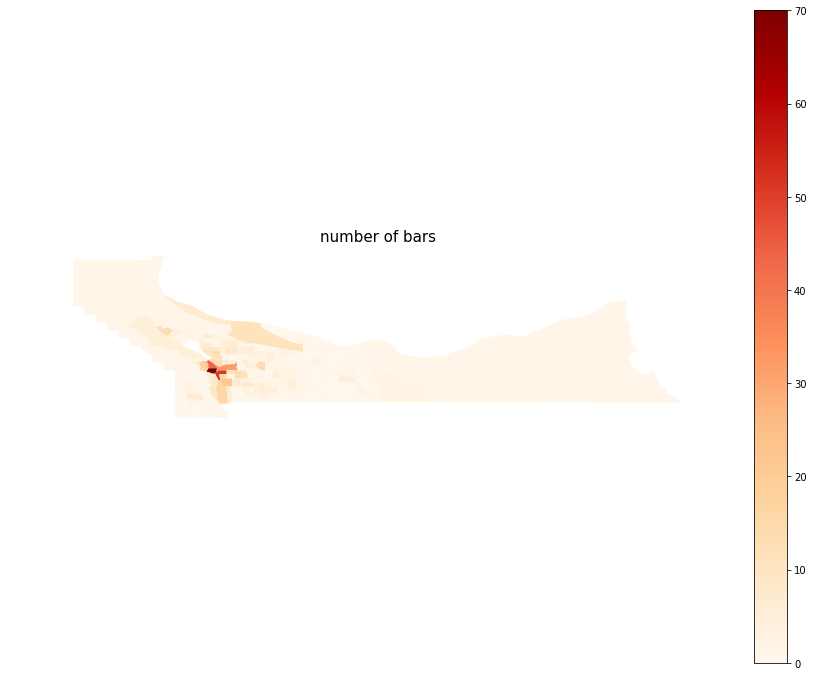

In [229]:
ct.plot(column='Nrestaurants', legend=True, figsize=(15,12), cmap='OrRd')
plt.axis('off')
plt.title('number of bars', fontsize=15)

In [255]:
ct['propRest'] = (ct['Nrestaurants'] - ct['Nrestaurants'].mean())/ct['Nrestaurants'].std()

In [256]:
temp1 = cluster0count.merge(ct, on='GEOID', how='outer')
temp1.fillna(value={'Nrestaurants':0, 'lat':0}, inplace=True)
temp1.dropna(subset=['geometry_x', 'lat'], inplace=True)

In [257]:
temp1.corr()

,GEOID,lat,ALAND,Id2,population_x,vacant_houses_perc,unemploy_rate,NumPoverty,NumEducated,GEO.id2,population_y,povRate,eduRate,Nrestaurants,propRest
GEOID,1.000000,0.113801,0.130466,1.000000,0.234121,0.147473,0.282822,0.207121,-0.025214,1.000000,0.179741,0.103315,-0.554934,0.075557,-0.227822
lat,0.113801,1.000000,-0.092892,0.041075,0.246730,0.258331,0.310066,0.496308,0.284625,0.041075,0.239222,0.497801,0.134057,0.616512,0.601786
ALAND,0.130466,-0.092892,1.000000,0.130466,-0.000065,0.093651,-0.081847,-0.117408,-0.055802,0.130466,-0.024683,-0.142183,-0.074699,-0.077320,-0.077320
Id2,1.000000,0.041075,0.130466,1.000000,0.234121,0.147473,0.282822,0.207121,-0.025214,1.000000,0.179741,0.103315,-0.554934,-0.227822,-0.227822
population_x,0.234121,0.246730,-0.000065,0.234121,1.000000,-0.119659,0.312539,0.641539,0.897537,0.234121,0.980643,0.107646,-0.341421,-0.104452,-0.104452
vacant_houses_perc,0.147473,0.258331,0.093651,0.147473,-0.119659,1.000000,0.082892,0.142509,-0.051014,0.147473,-0.079287,0.230780,0.112866,0.281808,0.281808
unemploy_rate,0.282822,0.310066,-0.081847,0.282822,0.312539,0.082892,1.000000,0.619412,0.193572,0.282822,0.314510,0.592824,-0.269326,0.037558,0.037558
NumPoverty,0.207121,0.496308,-0.117408,0.207121,0.641539,0.142509,0.619412,1.000000,0.620124,0.207121,0.671355,0.750598,-0.142974,0.179814,0.179814
NumEducated,-0.025214,0.284625,-0.055802,-0.025214,0.897537,-0.051014,0.193572,0.620124,1.000000,-0.025214,0.932316,0.137023,0.042865,0.078018,0.078018
GEO.id2,1.000000,0.041075,0.130466,1.000000,0.234121,0.147473,0.282822,0.207121,-0.025214,1.000000,0.179741,0.103315,-0.554934,-0.227822,-0.227822


In [258]:
## Normalize ??????

,AFFGEOID,GEOID,ALAND,geometry,Id2,population_x,vacant_houses_perc,Id,unemploy_rate,NumPoverty,NumEducated,GEO.id2,population_y,povRate,eduRate,Nrestaurants,propRest
0,1400000US41051000301,41051000301,2270906,"POLYGON ((-122.643518 45.490316, -122.639572 4...",41051000301,5041,3.9,1400000US41051000301,6.2,558,2689,41051000301,5504,0.101381,0.488554,1.0,-0.440744
1,1400000US41051001701,41051001701,2024977,"POLYGON ((-122.596482 45.528266, -122.596431 4...",41051001701,6402,5.3,1400000US41051001701,5.7,536,4657,41051001701,7031,0.076234,0.662352,14.0,1.026190
2,1400000US41051002901,41051002901,1536178,"POLYGON ((-122.604511 45.549671, -122.60448 45...",41051002901,4428,4.5,1400000US41051002901,5.3,250,2961,41051002901,4432,0.056408,0.668096,4.0,-0.102221
3,1400000US41051003501,41051003501,1285559,"POLYGON ((-122.697557 45.56269899999999, -122....",41051003501,3518,4.5,1400000US41051003501,5.5,320,2492,41051003501,3644,0.087816,0.683864,8.0,0.349143
4,1400000US41051004900,41051004900,545636,"POLYGON ((-122.700853 45.535454, -122.694762 4...",41051004900,3537,7.3,1400000US41051004900,4.0,612,3023,41051004900,4034,0.151710,0.749380,18.0,1.477554
5,1400000US41051006601,41051006601,1575380,"POLYGON ((-122.743654 45.469466, -122.743626 4...",41051006601,2513,5.3,1400000US41051006601,4.3,74,1438,41051006601,2557,0.028940,0.562378,0.0,-0.553585
6,1400000US41051006701,41051006701,1850323,"POLYGON ((-122.743745 45.487084, -122.731621 4...",41051006701,3053,6.9,1400000US41051006701,7.6,131,1644,41051006701,3295,0.039757,0.498938,1.0,-0.440744
7,1400000US41051009606,41051009606,1220108,"POLYGON ((-122.496456 45.522201, -122.496377 4...",41051009606,5251,6.6,1400000US41051009606,5.9,851,2908,41051009606,5735,0.148387,0.507062,0.0,-0.553585
8,1400000US41051009701,41051009701,1822028,"POLYGON ((-122.510729 45.510216, -122.510715 4...",41051009701,5611,5.4,1400000US41051009701,14.1,909,3414,41051009701,5768,0.157594,0.591886,1.0,-0.440744
9,1400000US41051010002,41051010002,1933773,"POLYGON ((-122.464791 45.492861, -122.458407 4...",41051010002,4994,4.4,1400000US41051010002,6.7,621,2878,41051010002,5590,0.111091,0.514848,0.0,-0.553585
